# Hugging Face
---
Hugging Face is an American company that develops tools for building applications using machine learning. It is most notable for its transformers library built for natural language processing applications and its platform that allows users to share machine learning models and datasets. Hugging Face provides tools that enable users to build, train, and deploy machine learning models based on open-source code and technologies. It is also a community and data science platform where a broad community of data scientists, researchers, and machine learning engineers can come together and share ideas, get support, and contribute to open-source projects.


## Text Classification
---

This involves categorizing text into different classes or categories. Models like BERT, RoBERTa, and ALBERT are commonly used for this task.

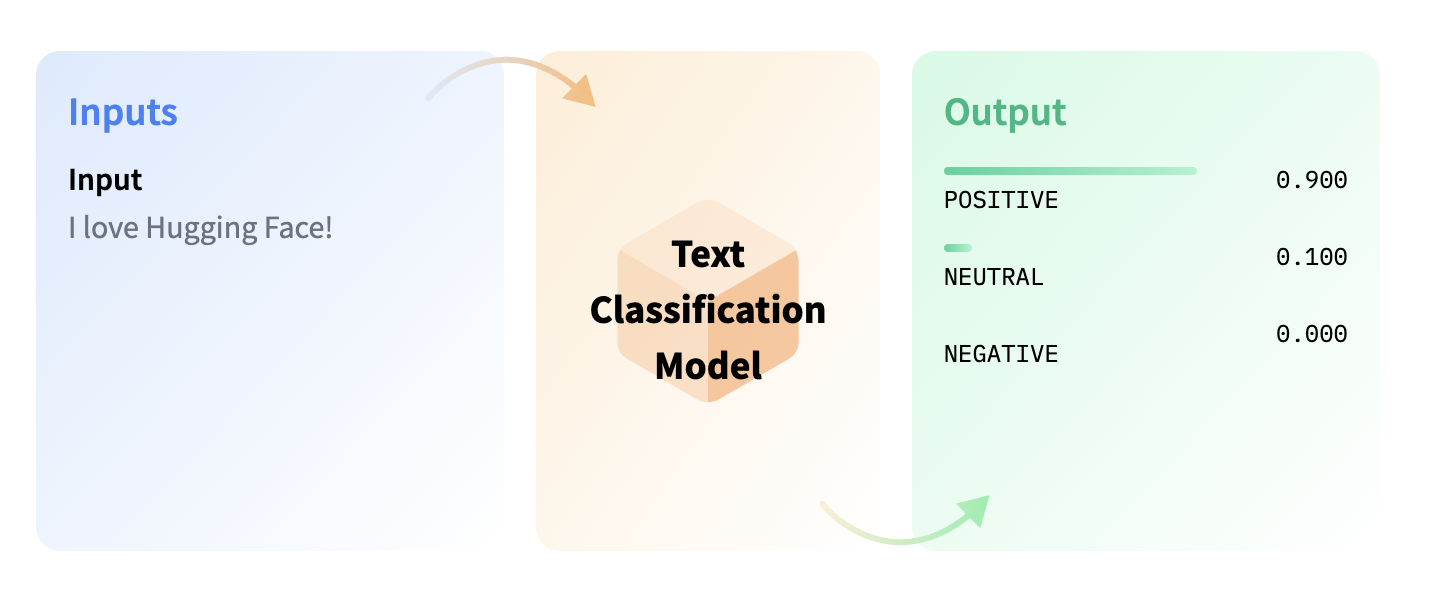

In [2]:
! pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 64.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 86.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.8 MB/s eta 0:00:00


In [3]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
classifier("I loved Star Wars so much!")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


[{'label': 'POSITIVE', 'score': 0.999840259552002}]

## Text Generation
---
Generating text is the task of producing new text. These models can, for example, fill in incomplete text or paraphrase.


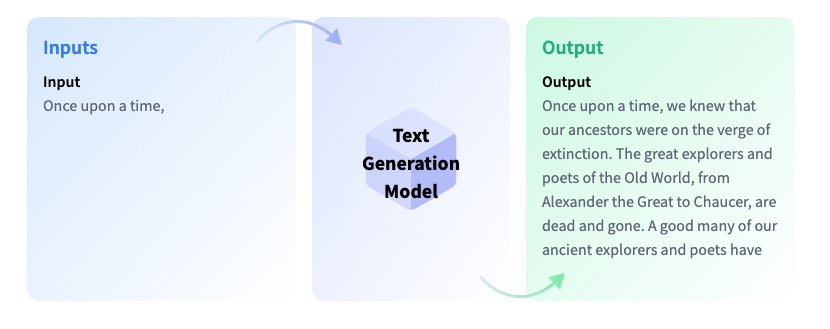

In [4]:
from transformers import pipeline
generator = pipeline('text-generation', model = 'gpt2')
generator("Hello, I'm a language model", max_length = 30, num_return_sequences=3)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Hello, I'm a language modeler with some experience on happier times and things not going to be on my mind this morning with our next conference ("},
 {'generated_text': "Hello, I'm a language modeler. So I know what you want: lots of variables, a lot of variables. I want to make sense"},
 {'generated_text': "Hello, I'm a language model and I have a lot to learn. I am an engineer and have to learn the basic building blocks of a basic"}]

## Translation
----

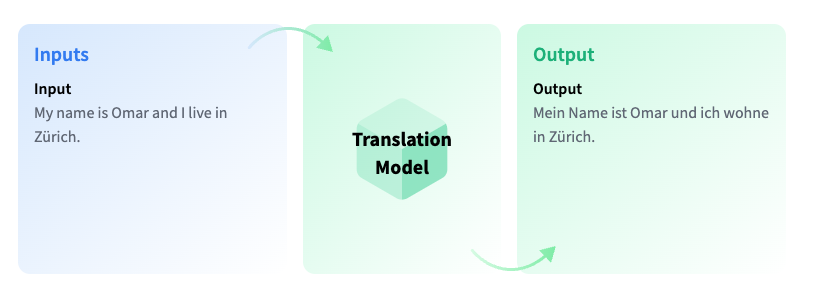

In [5]:
from transformers import pipeline

en_fr_translator = pipeline("translation_en_to_fr")
en_fr_translator("How old are you?")

No model was supplied, defaulted to t5-base and revision 686f1db (https://huggingface.co/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


[{'translation_text': ' quel âge êtes-vous?'}]

[ Here you can find what you need to get started with a task: demos, use cases, models, datasets, and more!](https://huggingface.co/tasks)

# Fine Tuning
----

Fine-tuning, in the context of deep learning and neural networks, refers to a technique called transfer learning. It involves taking a pre-trained model and training its weights on new data.
Here are some key points about fine-tuning:

1. Fine-tuning can be applied to the entire neural network or only a subset of its layers.

2. It is a process of taking a model that has already been trained for one task and tweaking it to perform a second similar task.

3. The purpose of fine-tuning is to leverage the knowledge gained from the initial training to improve performance on a related task.

4. Fine-tuning can be useful when there is limited data available for training a new model from scratch.

5. It can speed up the training process and help overcome the challenges of small dataset size.

Overall, fine-tuning allows for the transfer of knowledge from one task to another, improving the efficiency and effectiveness of training neural networks.

In [12]:
!pip install transformers[torch]
!pip install accelerate -U

In [2]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load the pretrained GPT-2 model and tokenizer
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Generate text using the base GPT-2 model
prompt = "Once upon a time"
input_ids = tokenizer.encode(prompt, return_tensors="pt")
output = model.generate(input_ids, max_length=100, num_return_sequences=1, no_repeat_ngram_size=2, top_k=50)
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [8]:
print(generated_text)

Once upon a time, the world was a place of great beauty and great danger. The world of the gods was the place where the great gods were born, and where they were to live.

The world that was created was not the same as the one that is now. It was an endless, endless world. And the Gods were not born of nothing. They were created of a single, single thing. That was why the universe was so beautiful. Because the cosmos was made of two


In [9]:
with open("finetune_dataset.txt", 'w') as sample_dataset:
  sample_dataset.write(f"""
  Once upon a time, in a land far away, there lived a brave knight named Arthur.\n
  He embarked on a quest to find the legendary sword Excalibur and save the kingdom.\n
  As he journeyed through dense forests and treacherous mountains, he faced many challenges.\n
  One day, he encountered a wise old wizard who gave him advice on his journey.\n
  After many trials and battles, Arthur finally reached the cave where Excalibur was said to be.\n
  With a mighty pull, he withdrew the sword from the stone, proving his worthiness.\n
  The kingdom rejoiced as Arthur returned, the true king destined to rule with honor and valor.)\n""")

In [3]:
from transformers import TextDataset, DataCollatorForLanguageModeling, Trainer, TrainingArguments


# Example text dataset for finetuning
text_dataset = TextDataset(
    tokenizer=tokenizer,
    file_path="finetune_dataset.txt",  # Path to your text dataset for finetuning
    block_size=128,  # Adjust this according to your dataset
)

data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, mlm=False
)

training_args = TrainingArguments(
    output_dir="./finetuned_model",
    overwrite_output_dir=True,
    num_train_epochs=100,
    per_device_train_batch_size=8,
    save_total_limit=2
)

# Fine-tune the model
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=text_dataset,
)

trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss


TrainOutput(global_step=100, training_loss=0.1964200782775879, metrics={'train_runtime': 16.3039, 'train_samples_per_second': 6.134, 'train_steps_per_second': 6.134, 'total_flos': 6532300800000.0, 'train_loss': 0.1964200782775879, 'epoch': 100.0})

In [4]:
# Generate text using the finetuned model
input_ids = input_ids.to('cuda:0')
output = model.generate(input_ids, max_length=50, num_return_sequences=1, no_repeat_ngram_size=2, top_k=50)
generated_text_finetuned = tokenizer.decode(output[0], skip_special_tokens=True)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [5]:
print("Generated Text (Finetuned GPT-2):", generated_text_finetuned)

Generated Text (Finetuned GPT-2): Once upon a time, in a land far away, there lived a brave knight named Arthur.


He embarked on a quest to find the legendary sword Excalibur and save the kingdom. As he journeyed through dense forests and treacherous mountains,
